In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120.0,NaN,0,1,NaN,0,0.8,2,0,2,1
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

,0
age,28
sex,13
cp,0
trestbps,19
chol,16
fbs,0
restecg,0
thalach,19
exang,0
oldpeak,0


In [ ]:
df = df.dropna(subset=['age', 'sex','trestbps','chol','thalach'])

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.shape

(218, 14)

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.095680,-0.050246,0.308573,0.213036,0.129840,-0.096305,-0.398086,0.090353,0.249356,-0.153035,0.274331,0.113171,-0.204664
sex,-0.095680,1.000000,-0.034801,-0.031404,-0.213630,0.090632,-0.061587,-0.011164,0.129984,0.064320,-0.022312,0.084481,0.146196,-0.271326
cp,-0.050246,-0.034801,1.000000,0.004230,-0.095389,0.107799,0.100461,0.299689,-0.383431,-0.174049,0.138056,-0.194488,-0.177926,0.455223
trestbps,0.308573,-0.031404,0.004230,1.000000,0.104395,0.185525,-0.100653,-0.067613,0.009561,0.238417,-0.106563,0.121565,0.070886,-0.154744
chol,0.213036,-0.213630,-0.095389,0.104395,1.000000,-0.044401,-0.126855,0.003772,0.055487,0.046511,-0.038080,0.050080,0.124158,-0.076871
fbs,0.129840,0.090632,0.107799,0.185525,-0.044401,1.000000,-0.090770,-0.024491,0.046957,-0.016704,-0.119125,0.110708,-0.088500,-0.059724
restecg,-0.096305,-0.061587,0.100461,-0.100653,-0.126855,-0.090770,1.000000,0.055556,-0.031649,-0.037142,0.076195,-0.078882,-0.051642,0.182833
thalach,-0.398086,-0.011164,0.299689,-0.067613,0.003772,-0.024491,0.055556,1.000000,-0.399947,-0.360779,0.372039,-0.186854,-0.101617,0.439719
exang,0.090353,0.129984,-0.383431,0.009561,0.055487,0.046957,-0.031649,-0.399947,1.000000,0.271231,-0.207740,0.132521,0.179348,-0.474589
oldpeak,0.249356,0.064320,-0.174049,0.238417,0.046511,-0.016704,-0.037142,-0.360779,0.271231,1.000000,-0.597868,0.236518,0.168560,-0.478186


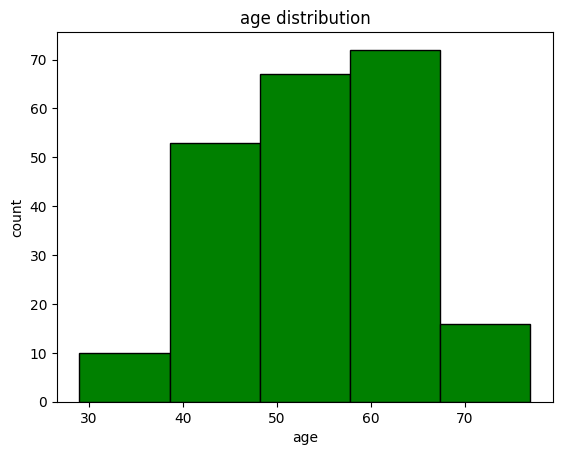

In [ ]:
plt.hist(df['age'],facecolor='green',edgecolor='black',bins=5)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

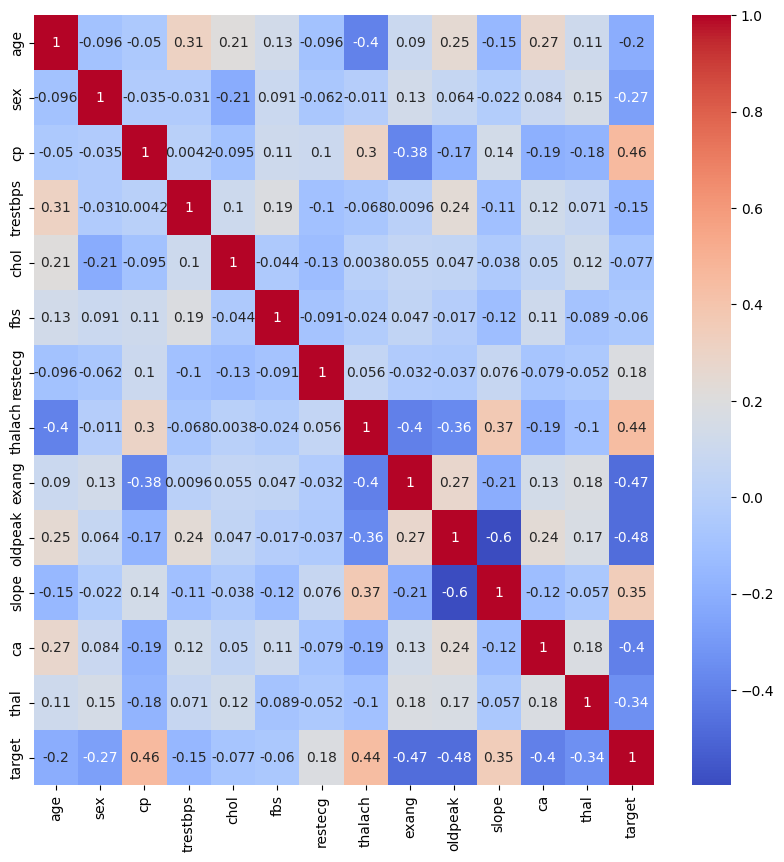

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()

<Axes: xlabel='target', ylabel='count'>

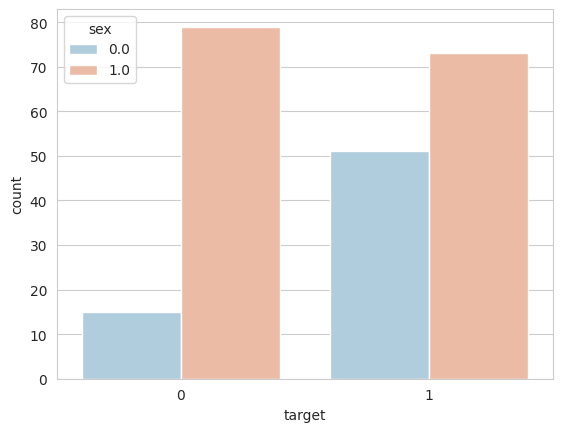

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r',hue='sex')


<ipython-input-25-e9d851ad4402>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

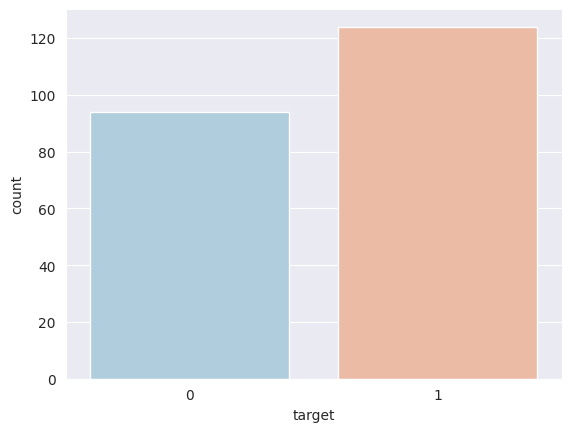

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,int64
trestbps,float64
chol,float64
fbs,int64
restecg,int64
thalach,float64
exang,int64
oldpeak,float64


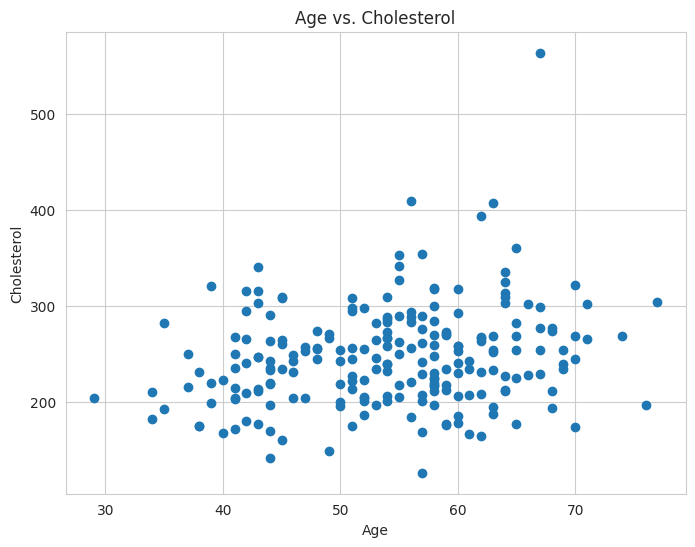

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol')
plt.show()

In [ ]:
X = df.drop(['target'],axis=1)
y = df['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41.0,0.0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
4,57.0,0.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2
6,56.0,0.0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2


In [ ]:
y.head()

,target
0,1
1,1
2,1
4,1
6,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
# prompt: use logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8636363636363636

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.87      0.93      0.90        29

    accuracy                           0.86        44
   macro avg       0.86      0.83      0.84        44
weighted avg       0.86      0.86      0.86        44


Confusion Matrix:
 [[11  4]
 [ 2 27]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


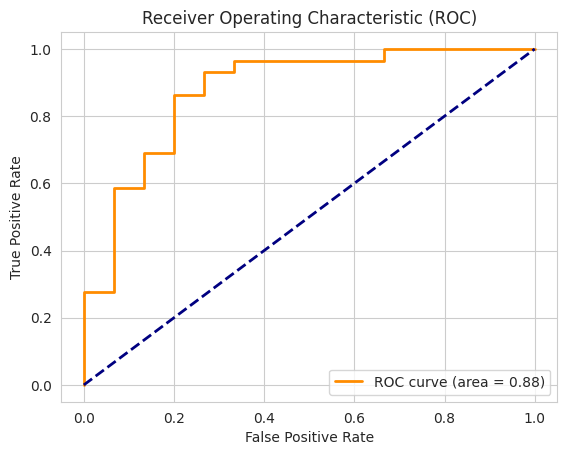

In [ ]:
# prompt: draw auc_roc curve

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: take input from user to predict

# Get input from the user for each feature
age = float(input("Enter age: "))
sex = float(input("Enter sex (1 for male, 0 for female): "))
cp = float(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure: "))
chol = float(input("Enter serum cholesterol: "))
fbs = float(input("Enter fasting blood sugar (1 if > 120 mg/dl, 0 otherwise): "))
restecg = float(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = float(input("Enter exercise induced angina (1 for yes, 0 for no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = float(input("Enter the slope of the peak exercise ST segment: "))
ca = float(input("Enter number of major vessels (0-3) colored by flourosopy: "))
thal = float(input("Enter thalassemia (0-2): "))


# Create a new data point with the user's input
new_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]
})

# Make a prediction using the trained model
prediction = model.predict(new_data)

# Print the prediction
if prediction[0] == 1:
  print("Prediction: The patient is likely to have heart disease.")
else:
  print("Prediction: The patient is likely not to have heart disease.")

Enter age: 23
Enter sex (1 for male, 0 for female): 1
Enter chest pain type (0-3): 2
Enter resting blood pressure: 22
Enter serum cholesterol: 21
Enter fasting blood sugar (1 if > 120 mg/dl, 0 otherwise): 1
Enter resting electrocardiographic results (0-2): 1
Enter maximum heart rate achieved: 98
Enter exercise induced angina (1 for yes, 0 for no): 1
Enter ST depression induced by exercise relative to rest: 22
Enter the slope of the peak exercise ST segment: 2
Enter number of major vessels (0-3) colored by flourosopy: 2
Enter thalassemia (0-2): 1
Prediction: The patient is likely not to have heart disease.
